# STAT207 Mini-Project #1 - Analyzing the Impact of Material Type on the Relationship Between Price and Water Usage in Fashion


Sanjana Settipalli

In [1]:
#Imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

Pricing in the fashion industry is shaped by multiple factors, including material selection and resource consumption. This report seeks to answer the research question: **How does the relationship between water usage and price vary across different material types in the dataset?** By examining these relationships, I hope to uncover how material choices and production methods impact both cost and sustainability. These insights can be valuable for fashion retailers, manufacturers, and sustainability advocates. For example, clothing brands can use this analysis to evaluate how cost effective various materials are, while consumers may better understand how pricing reflects environmental impact. Ultimately, this study provides key insights into the cost drivers of fashion production and their broader implications for affordability and sustainability.

## 2. Dataset Discussion

The dataset, titled Sustainable Fashion & Eco-Friendly Trends and sourced from Kaggle, consists of rows representing individual fashion brands, each characterized by sustainability metrics such as material choices, water usage, and pricing. You can access the dataset from [this link](https://www.kaggle.com/datasets/waqi786/sustainable-fashion-eco-friendly-trends). While the dataset’s collection method is not explicitly detailed in its documentation, it likely aggregates data from industry reports, sustainability research, and retail pricing sources. However, it may exclude niche or locally produced brands, potentially skewing insights toward mainstream or eco-conscious brands. This limitation means findings could overrepresent trends in larger brands, which may not reflect practices in smaller or regional markets. For this analysis, three variables will be explored: Material Type (primary fabric composition), Water Usage (production-related consumption), and Price (average product cost). Understanding the relationships between these variables can provide valuable insights for sustainable fashion brands and environmentally conscious consumers seeking to balance cost and sustainability.

In [41]:
df = pd.read_csv("fashion.csv")
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [42]:
df.shape[0]

5000

## 3. Dataset Cleaning

### Missing Value Detection

In [43]:
df.isna().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

There's are 1004 explicit missing values in the Certification column as shown through the isna() function.

In [44]:
df.dtypes

Brand_ID                       object
Brand_Name                     object
Country                        object
Year                            int64
Sustainability_Rating          object
Material_Type                  object
Eco_Friendly_Manufacturing     object
Carbon_Footprint_MT           float64
Water_Usage_Liters            float64
Waste_Production_KG           float64
Recycling_Programs             object
Product_Lines                   int64
Average_Price_USD             float64
Market_Trend                   object
Certifications                 object
dtype: object

No implicit missing values because all the columns are the datatype they're supposed to be.

In [45]:
rows = df.shape[0]
df = df.dropna()
rows_dropped = rows - df.shape[0]
rows_dropped

1004

After dropping rows with null values in the certification column, I removed 1,004 rows from the dataset. As a result, I am working with a smaller dataset than I would have if I had retained those rows. This introduces a potential lack of representativeness, as we are excluding certain brands—possibly smaller or emerging ones—that may not have certifications, either due to financial constraints or lack of formal recognition. This could skew the analysis toward more established brands that have obtained certifications.

However, dropping null values in this case is also beneficial. By removing brands without certifications, we ensure that the dataset focuses on brands that have undergone some level of validation, potentially making them more credible in terms of sustainability. Additionally, cleaning the certification column allows for a more accurate analysis when comparing certification status with other variables, improving the reliability of our insights.

### Sample Size Cleaning

In [46]:
df["Material_Type"].value_counts(normalize = False)

Material_Type
Recycled Polyester    696
Hemp                  692
Bamboo Fabric         661
Organic Cotton        661
Tencel                645
Vegan Leather         641
Name: count, dtype: int64

### Outlier Cleaning

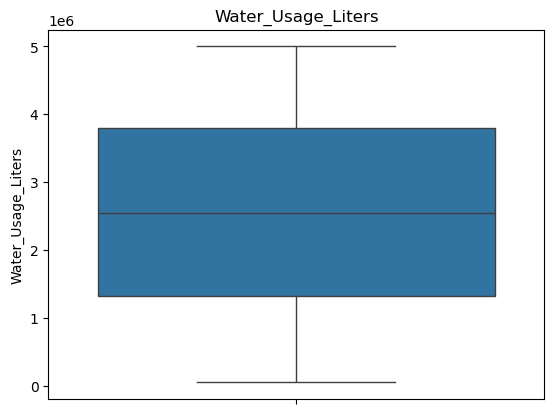

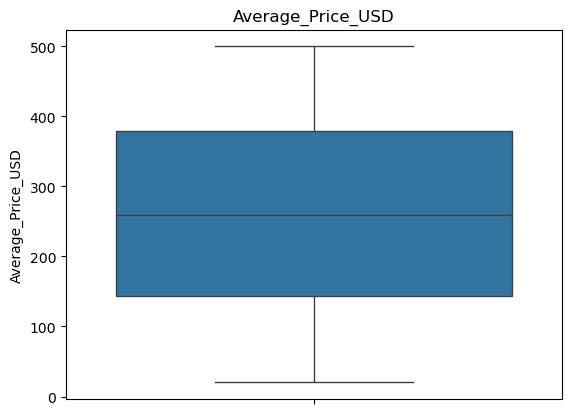

In [47]:
num_cols = ["Water_Usage_Liters", "Average_Price_USD"]
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

To identify potential outliers, I created boxplots for each numerical variable in my analysis: Water Usage and Price. After examining the boxplots, I did not detect any significant outliers in the dataset.

Since no extreme values were found, no rows were dropped in this step. This suggests that the dataset is relatively well-distributed and does not contain anomalies that could distort the analysis. Keeping all observations ensures that we are working with a complete dataset, maintaining the full range of variability in Water Usage and Price while preserving the integrity of our findings.

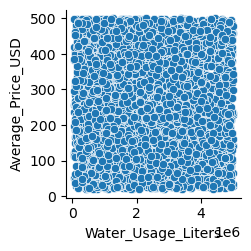

In [48]:
sns.pairplot(data = df, x_vars = "Water_Usage_Liters", y_vars = "Average_Price_USD")
plt.show()

To identify potential outliers for two variable outliter inspection, I created a pairplot for the numerical variables in my analysis: Water Usage and Price. After examining the pairplot, I again did not detect any significant outliers in the dataset.

Since no extreme values were found, no rows were dropped in this step. This suggests that the dataset is relatively well-distributed and does not contain anomalies that could distort the analysis. Keeping all observations ensures that we are working with a complete dataset, maintaining the full range of variability in Water Usage and Price while preserving the integrity of our findings.

### Check for duplicates

In [49]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


No duplicate rows so no rows are dropped again. 

### Ensure Consistency in Categorical Variable Column

In [50]:
print(df['Material_Type'].unique())

['Tencel' 'Vegan Leather' 'Bamboo Fabric' 'Recycled Polyester' 'Hemp'
 'Organic Cotton']


I wanted to check for inconsistencies in Material Type (e.g., "organic cotton" vs. "Organic Cotton") and standardize the labels if that was the case. But it looked like all the different materials were consistent and different. 

### Remove Irrelevant Columns

In [51]:
my_df = df[["Material_Type", "Water_Usage_Liters", "Average_Price_USD"]]
my_df

,Material_Type,Water_Usage_Liters,Average_Price_USD
0,Tencel,4511152.79,38.33
1,Vegan Leather,1951566.31,250.07
2,Vegan Leather,467454.52,146.16
3,Bamboo Fabric,899576.90,165.52
4,Bamboo Fabric,1809219.90,211.63
...,...,...,...
4992,Recycled Polyester,3456523.67,149.51
4993,Hemp,287417.81,40.28
4994,Recycled Polyester,295297.69,46.91
4996,Bamboo Fabric,2342347.78,53.92


I wanted to make a new dataset for only the columns that I'm working with for this analysis.

## 4. <u>Research Question</u>: How does the Relationship between `Price` and `Water Usage` Change based on Different Values of `Material Type` in the Dataset?

In [52]:
num_cols = my_df.select_dtypes(include=["number"])
num_cols.corr()

,Water_Usage_Liters,Average_Price_USD
Water_Usage_Liters,1.000000,0.013597
Average_Price_USD,0.013597,1.000000


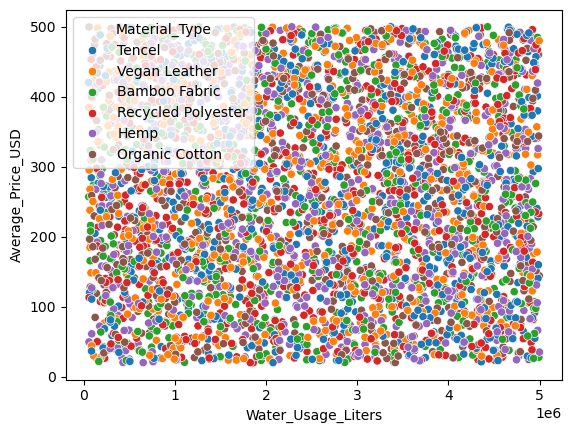

In [53]:
sns.scatterplot(x="Water_Usage_Liters", y = "Average_Price_USD", hue = "Material_Type", data = df)
plt.show()

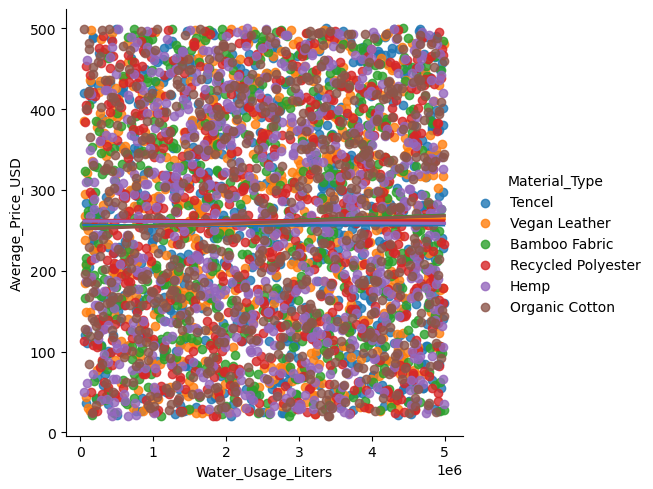

In [54]:
sns.lmplot(x='Water_Usage_Liters', y='Average_Price_USD', hue = "Material_Type",ci = False, data=df)
plt.show()

By calculating correlation values for each material type, I can provide a more data-driven explanation of how water usage and price interact across different fabrics, strengthening the overall analysis. So that's why I'm doing that below.

In [55]:
df[["Water_Usage_Liters", "Average_Price_USD", "Material_Type"]].groupby(["Material_Type"]).corr()

Water_Usage_Liters  Average_Price_USD
Material_Type                                                               
Bamboo Fabric      Water_Usage_Liters            1.000000           0.032525
                   Average_Price_USD             0.032525           1.000000
Hemp               Water_Usage_Liters            1.000000          -0.006002
                   Average_Price_USD            -0.006002           1.000000
Organic Cotton     Water_Usage_Liters            1.000000           0.034443
                   Average_Price_USD             0.034443           1.000000
Recycled Polyester Water_Usage_Liters            1.000000          -0.001245
                   Average_Price_USD            -0.001245           1.000000
Tencel             Water_Usage_Liters            1.000000           0.001743
                   Average_Price_USD             0.001743           1.000000
Vegan Leather      Water_Usage_Liters            1.000000           0.022596
                   Average_Price_USD             0.022596           1.000000

Now we want to answer our main research question: How does the Relationship between `Price` and `Water Usage` Change based on Different Values of `Material Type` in the Dataset? Let's compare a few things about the numerical variables relationship for different values of material. 

1. Direction Changes: The relationship between Average Price and Water Usage is relatively flat for all material types, suggesting that water usage does not have a strong directional relationship with price.
2. Shape Changes: The shape of the relationship between Water Usage and Price is a horizontal spread for all material types, indicating price is widely distributed across different water usage levels. The shape of the distribution does not exhibit a clear linear or exponential trend, meaning that price variation does not follow a specific pattern based on water usage. This also suggests that material type might play a bigger role in price variation than water usage alone.
3. Strength Changes: The strength of the relationship between water usage and price is relatively weak for all material types. Although according to the correlation matrix, correlation between water usage and price is a bit higher for the material types Bamboo Frabic and Organic Cotton.
4. Outlier differences: The absence of outliers means that all material types generally follow the same spread of price and water usage, without extreme deviations. This suggests a consistent pricing trend across different brands and materials rather than anomalies driven by luxury or niche markets.
5. Slope Changes: The differences in slopes suggest that water usage has a significant impact on pricing for Organic Cotton but not as much for other materials. This insight is valuable for brands considering sustainability strategies, as it highlights how water-intensive materials might be positioned as premium products in the market.

The relationship between water usage and price is generally weak across material types, with the exception of Organic Cotton, where water usage has a more noticeable influence on pricing. This indicates that while water usage is a contributing factor to pricing, material types and other variables likely play a larger role in determining the final price of products in the sustainable fashion industry.

## 5. Conclusion

Overall, the relationship is weak across most material types, suggesting that factors other than water usage, such as material quality or brand positioning, are more influential in determining price. The correlation between water usage and price is slightly stronger for materials like Bamboo Fabric and Organic Cotton, with Organic Cotton showing a more noticeable impact of water usage on pricing. However, in general, the relationship between water usage and price remains relatively flat, indicating that sustainability factors such as water usage may not always directly translate into higher prices.

One major limitation of this analysis is that the dataset may not account for all external factors influencing price, such as labor costs, supply chain dynamics, and market demand. The absence of these variables might cause an oversimplification of the relationship between water usage and pricing. Additionally, the dataset may be biased toward more mainstream sustainable brands, which could impact the generalizability of the findings to niche or luxury brands. For practitioners in the fashion industry or consumers using these insights, it’s essential to recognize that the pricing decisions for eco-friendly materials could also involve broader economic, ethical, and marketing considerations beyond just water usage. As a result, while this research provides useful insights, practitioners in the fashion industry or eco-conscious consumers should consider these factors when interpreting the results.

Future work could involve incorporating additional variables such as the carbon footprint of production, labor conditions, or material sourcing costs to create a more holistic view of pricing in sustainable fashion. Additionally, a longitudinal study that tracks how these relationships evolve over time—especially as consumer demand for sustainable products grows—could provide valuable insights into trends in pricing and material sustainability.